In [1]:

from numpy import genfromtxt
import sys
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

data = genfromtxt("task2_baseline1.csv", delimiter=",")
data2 = genfromtxt("task2_baseline2.csv", delimiter=",")

interference_b1 = genfromtxt("task2_interference_b1.csv", delimiter=",")
interference_b2 = genfromtxt("task2_interference_b2.csv", delimiter=",")
data.shape

error_angles1 = data[0]
error_angles2 = data2[0]

ea_b1 = interference_b1[0]
ea_b2 = interference_b2[0]

no_pert_error1 = error_angles1[0:40]
no_pert_error2 = error_angles2[0:40]

mean = np.nanmean(no_pert_error1)
std = np.nanstd(no_pert_error1)

#error_angles_1 = (error_angles1 -mean) / std

#print(mean)
#print(std)

mean_b1 = np.nanmean(ea_b1)
median_b1 = np.nanmedian(ea_b1)

print('mean: ', mean_b1)
print('median: ',median_b1)




mean:  1.4539087282244592
median:  1.579895157194816


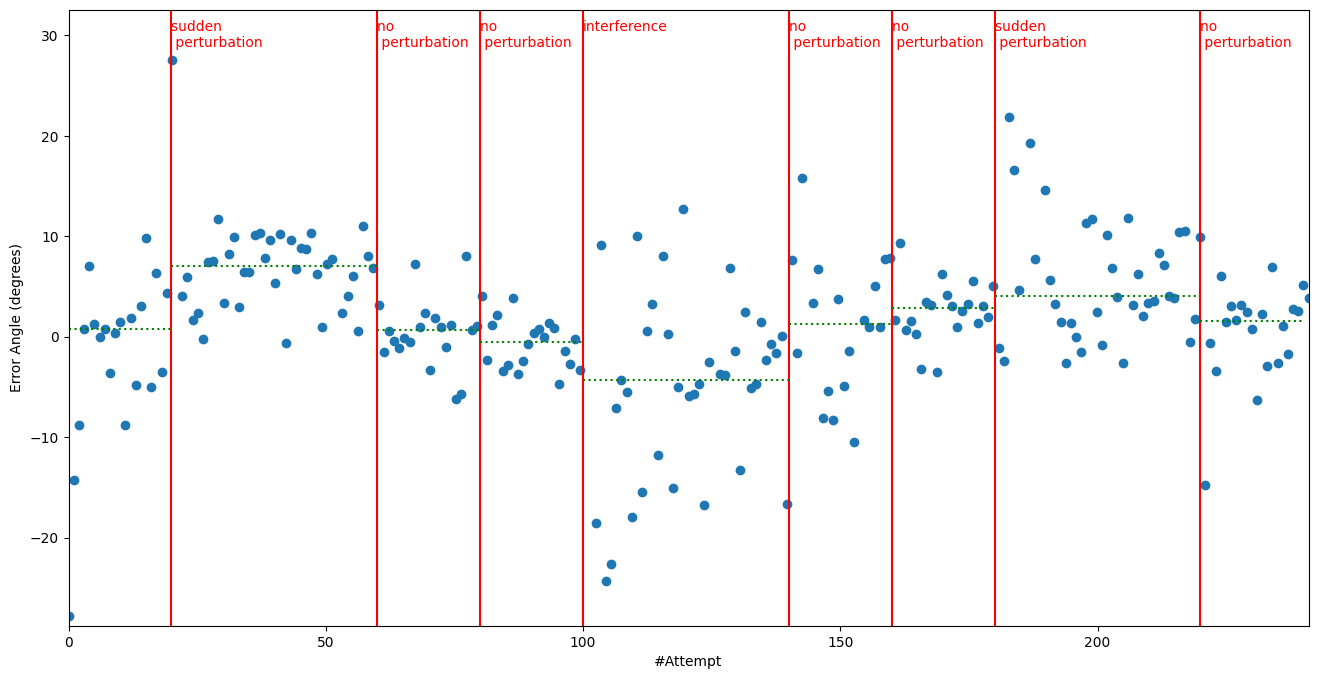

ValueError: Image size of 1355x171497 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1600x800 with 1 Axes>

In [4]:


def running_mean(input_array, window_size):
    cumsum = np.cumsum(np.insert(input_array, 0, 0))
    moving_averages = (cumsum[window_size:] - cumsum[:-window_size]) / window_size
    result = np.concatenate((np.full(window_size-1, np.nan), moving_averages))
    
    return result

def running_mean2(arr,window_size):
    i = 0
    moving_averages = []

    while i < len(arr) - window_size + 1:

        window_average = round(np.sum(arr[
        i:i+window_size]) / window_size, 2)
        moving_averages.append(window_average)

        i += 1

        return moving_averages


error_angles = ea_b1
timestamps_changes = [1,20,60,80,100,140,160,180,220,240]
timestamps_changes_full = [0,20,60,80,100,140,160,180,220,240]
ATTEMPTS_LIMIT = timestamps_changes[len(timestamps_changes)-1]+1
pertubations = ['sudden \n perturbation', 'no \n perturbation', 'no \n perturbation',  'interference', 'no \n perturbation', 'no \n perturbation',  'sudden \n perturbation', 'no \n perturbation']
    

error_angles = np.array(error_angles)
att_nr=np.linspace(0,len(error_angles),len(error_angles))
# points are connected between nan values
mask = np.isfinite(error_angles.astype(np.double))


timestamps_changes = np.array(timestamps_changes)

error_segments = []
mean_values = []
mov_var_list = []

# Loop to create segments and calculate mean error angle and movement variability

for i in range(len(timestamps_changes) - 1):

    start_index = int(timestamps_changes[i])
    end_index = int(timestamps_changes[i + 1])
    segment = error_angles[start_index:end_index]
    segment = np.array(segment)

    mean_value_seg = np.nanmedian(segment)
    mov_var_seg = np.nanstd(segment)
    
    error_segments.append(segment)
    mean_values.append(mean_value_seg)
    mov_var_list.append(mov_var_seg)



smooth = running_mean(mask,3)
smooth2 = running_mean2(mask,3)
for i in range(len(smooth)):
    if smooth[i] >1:
        print(smooth[i])
    

plt.figure(figsize=(16,8))
#plt.plot(att_nr[mask],error_angles[mask], linestyle = 'dashed')

plt.plot(np.arange(0,len(smooth)),smooth, color = 'orange')
plt.scatter(att_nr,error_angles)
plt.xlabel('#Attempt')
plt.ylabel('Error Angle (degrees)')
plt.xlim(0,ATTEMPTS_LIMIT)
plt.ylim(np.nanmin(error_angles)-1, np.nanmax(error_angles+5))
for change in range(1, len(timestamps_changes)-1):
    plt.axvline(x=timestamps_changes[change], color='red')
    plt.text(timestamps_changes[change], np.nanmax(error_angles)+4, pertubations[change -1], color = 'red',rotation=0, va='top')


for i, mean_value in enumerate(mean_values):
    plt.axhline(mean_value, color='green', linestyle='dotted', xmin=timestamps_changes_full[i] / len(att_nr), xmax=timestamps_changes_full[i + 1] / len(att_nr))
    #plt.axhline(mean_value - mov_var_list[i], color='red', linestyle='dotted', xmin=timestamps_changes_full[i] / len(att_nr), xmax=timestamps_changes_full[i + 1] / len(att_nr))
    #plt.axhline(mean_value + mov_var_list[i], color='red', linestyle='dotted', xmin=timestamps_changes_full[i] / len(att_nr), xmax=timestamps_changes_full[i + 1] / len(att_nr))

    #plt.text(timestamps_changes_full[i], mean_value, f'Median: {mean_value:.2f}', color='black', va='bottom', ha='left')


plt.savefig('reaching_task_graph_new.png')
plt.show()


plt.figure(figsize=(16,8))
for change in range(1, len(timestamps_changes)-1):
    plt.axvline(x=timestamps_changes[change], color='red')
    plt.text(timestamps_changes[change], np.nanmax(error_angles)+4, pertubations[change -1], color = 'red',rotation=0, va='bottom')


adaptation = smooth*100
plt.plot(adaptation)
plt.scatter(np.arange(0,len(adaptation)),adaptation)
plt.ylabel('adaptation')
plt.xlabel('trail')
plt.show()